## Problem Statement

Substance abuse is a growing concern in modern society, affecting the health, productivity, and well-being of individuals. Early identification of individuals at risk of drug abuse is crucial for timely intervention and support. This project aims to develop an AI-based system that predicts the drug risk level of a person based on various behavioral, psychological, and demographic factors. By analyzing inputs such as mental health status, drug usage patterns, age, and lifestyle, the system can classify users into different risk levels (Low, Medium, High), enabling targeted awareness and rehabilitation efforts.

## under stand the data
Load and preview the data

In [53]:
import pandas as pd  # Importing pandas for data manipulation

# Reading the dataset into a DataFrame
df = pd.read_csv('Drug_last_updated1.csv')

# Displaying the DataFrame
df

,Income_Level,Ever_Used_Marijuana,Ever_Used_Cigarettes,Ever_Used_Alcohol,Age_Started_Cocaine,Ever_Used_Heroin,Ever_Used_Methamphetamine,Painkiller_Use_Recency,Mental_Health_Think,Alcohol_Use_Flag,...,Age_Group,Education_Highest_Category,Marijuana_First_Use_Age,Pain_Relievers_Non_Medical_Lifetime_Use,Cocaine_Dependence,Arrested_For_Drunkness,Arrested_For_Robbery,health.1,Age,Gender
0,Low Income,no,Yes,Yes,NaN,No,No,Never Used,NaN,yes,...,6.0,Postgraduate / Advanced Degree,NaN,No,0.0,99.0,99.0,Very Good,6,male
1,Lower Middle Income,yes,Yes,Yes,16.0,No,No,Never Used,No,yes,...,15.0,High School Graduate,15.0,NaN,0.0,2.0,2.0,Excellent,15,male
2,Low Income,no,No,Yes,NaN,No,No,Never Used,No,yes,...,14.0,College Graduate,NaN,No,0.0,99.0,99.0,Very Good,14,female
3,High Income,no,No,Yes,NaN,No,No,Never Used,NaN,yes,...,2.0,Postgraduate / Advanced Degree,NaN,NaN,0.0,99.0,99.0,Good,2,female
4,Low Income,no,Yes,Yes,NaN,No,No,Never Used,No,yes,...,11.0,Some College or Associate Degree,NaN,No,0.0,99.0,99.0,Good,11,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282743,Lower Middle Income,yes,Yes,Yes,NaN,No,No,Never Used,Yes,yes,...,10.0,Some College or Associate Degree,15.0,No,0.0,99.0,99.0,Very Good,7,female
282744,Lower Middle Income,yes,No,Yes,NaN,No,No,Never Used,No,yes,...,13.0,College Graduate,18.0,NaN,0.0,99.0,99.0,Very Good,2,male
282745,High Income,no,No,No,NaN,No,No,Never Used,NaN,no,...,3.0,Postgraduate / Advanced Degree,NaN,NaN,0.0,99.0,99.0,Very Good,7,female
282746,Lower Middle Income,yes,No,Yes,NaN,No,No,Never Used,NaN,yes,...,5.0,Postgraduate / Advanced Degree,15.0,No,0.0,99.0,99.0,Very Good,2,female


In [54]:
#Check the shape of the dataset
df.shape

(282748, 26)

In [55]:
#Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282748 entries, 0 to 282747
Data columns (total 26 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Income_Level                             282748 non-null  object 
 1   Ever_Used_Marijuana                      282551 non-null  object 
 2   Ever_Used_Cigarettes                     282748 non-null  object 
 3   Ever_Used_Alcohol                        282648 non-null  object 
 4   Age_Started_Cocaine                      33044 non-null   float64
 5   Ever_Used_Heroin                         282591 non-null  object 
 6   Ever_Used_Methamphetamine                282391 non-null  object 
 7   Painkiller_Use_Recency                   279348 non-null  object 
 8   Mental_Health_Think                      212952 non-null  object 
 9   Alcohol_Use_Flag                         282748 non-null  object 
 10  Dependent_On_Prescription_Pills 

In [56]:
#Preview the first few rows of the dataset
df.head(20)

,Income_Level,Ever_Used_Marijuana,Ever_Used_Cigarettes,Ever_Used_Alcohol,Age_Started_Cocaine,Ever_Used_Heroin,Ever_Used_Methamphetamine,Painkiller_Use_Recency,Mental_Health_Think,Alcohol_Use_Flag,...,Age_Group,Education_Highest_Category,Marijuana_First_Use_Age,Pain_Relievers_Non_Medical_Lifetime_Use,Cocaine_Dependence,Arrested_For_Drunkness,Arrested_For_Robbery,health.1,Age,Gender
0,Low Income,no,Yes,Yes,NaN,No,No,Never Used,NaN,yes,...,6.0,Postgraduate / Advanced Degree,NaN,No,0.0,99.0,99.0,Very Good,6,male
1,Lower Middle Income,yes,Yes,Yes,16.0,No,No,Never Used,No,yes,...,15.0,High School Graduate,15.0,NaN,0.0,2.0,2.0,Excellent,15,male
2,Low Income,no,No,Yes,NaN,No,No,Never Used,No,yes,...,14.0,College Graduate,NaN,No,0.0,99.0,99.0,Very Good,14,female
3,High Income,no,No,Yes,NaN,No,No,Never Used,NaN,yes,...,2.0,Postgraduate / Advanced Degree,NaN,NaN,0.0,99.0,99.0,Good,2,female
4,Low Income,no,Yes,Yes,NaN,No,No,Never Used,No,yes,...,11.0,Some College or Associate Degree,NaN,No,0.0,99.0,99.0,Good,11,female
5,Low Income,no,Yes,NaN,NaN,No,No,Never Used,No,yes,...,12.0,Some College or Associate Degree,NaN,NaN,0.0,99.0,99.0,Good,12,male
6,Lower Middle Income,no,Yes,Yes,NaN,No,No,Never Used,No,yes,...,12.0,High School Graduate,NaN,NaN,0.0,99.0,99.0,Very Good,12,male
7,High Income,no,No,No,NaN,No,No,Never Used,NaN,no,...,4.0,Postgraduate / Advanced Degree,NaN,NaN,0.0,99.0,99.0,Excellent,4,female
8,High Income,no,No,No,NaN,No,No,Never Used,NaN,no,...,2.0,Postgraduate / Advanced Degree,NaN,NaN,0.0,99.0,99.0,Very Good,2,male
9,Low Income,no,No,No,NaN,No,NaN,NaN,NaN,no,...,1.0,Postgraduate / Advanced Degree,NaN,NaN,0.0,99.0,99.0,Fair,1,female


In [57]:
#Preview the last few rows of the dataset
df.tail()

,Income_Level,Ever_Used_Marijuana,Ever_Used_Cigarettes,Ever_Used_Alcohol,Age_Started_Cocaine,Ever_Used_Heroin,Ever_Used_Methamphetamine,Painkiller_Use_Recency,Mental_Health_Think,Alcohol_Use_Flag,...,Age_Group,Education_Highest_Category,Marijuana_First_Use_Age,Pain_Relievers_Non_Medical_Lifetime_Use,Cocaine_Dependence,Arrested_For_Drunkness,Arrested_For_Robbery,health.1,Age,Gender
282743,Lower Middle Income,yes,Yes,Yes,NaN,No,No,Never Used,Yes,yes,...,10.0,Some College or Associate Degree,15.0,No,0.0,99.0,99.0,Very Good,7,female
282744,Lower Middle Income,yes,No,Yes,NaN,No,No,Never Used,No,yes,...,13.0,College Graduate,18.0,NaN,0.0,99.0,99.0,Very Good,2,male
282745,High Income,no,No,No,NaN,No,No,Never Used,NaN,no,...,3.0,Postgraduate / Advanced Degree,NaN,NaN,0.0,99.0,99.0,Very Good,7,female
282746,Lower Middle Income,yes,No,Yes,NaN,No,No,Never Used,NaN,yes,...,5.0,Postgraduate / Advanced Degree,15.0,No,0.0,99.0,99.0,Very Good,2,female
282747,Lower Middle Income,no,No,No,NaN,No,No,Never Used,NaN,no,...,4.0,Postgraduate / Advanced Degree,NaN,NaN,0.0,99.0,99.0,Excellent,15,male


# Data Cleaning

In [58]:
#Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282748 entries, 0 to 282747
Data columns (total 26 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Income_Level                             282748 non-null  object 
 1   Ever_Used_Marijuana                      282551 non-null  object 
 2   Ever_Used_Cigarettes                     282748 non-null  object 
 3   Ever_Used_Alcohol                        282648 non-null  object 
 4   Age_Started_Cocaine                      33044 non-null   float64
 5   Ever_Used_Heroin                         282591 non-null  object 
 6   Ever_Used_Methamphetamine                282391 non-null  object 
 7   Painkiller_Use_Recency                   279348 non-null  object 
 8   Mental_Health_Think                      212952 non-null  object 
 9   Alcohol_Use_Flag                         282748 non-null  object 
 10  Dependent_On_Prescription_Pills 

In [59]:
#Check for missing values
missing_values=df.isnull().sum()
print(missing_values[missing_values>0])

Ever_Used_Marijuana                           197
Ever_Used_Alcohol                             100
Age_Started_Cocaine                        249704
Ever_Used_Heroin                              157
Ever_Used_Methamphetamine                     357
Painkiller_Use_Recency                       3400
Mental_Health_Think                         69796
Marijuana_First_Use_Age                    161226
Pain_Relievers_Non_Medical_Lifetime_Use    132968
health.1                                       55
dtype: int64


In [60]:
# Check for missing values and calculate the percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

print(missing_percentage)

Ever_Used_Marijuana                         0.069673
Ever_Used_Alcohol                           0.035367
Age_Started_Cocaine                        88.313268
Ever_Used_Heroin                            0.055526
Ever_Used_Methamphetamine                   0.126261
Painkiller_Use_Recency                      1.202484
Mental_Health_Think                        24.684878
Marijuana_First_Use_Age                    57.021093
Pain_Relievers_Non_Medical_Lifetime_Use    47.027035
health.1                                    0.019452
dtype: float64


In [61]:
#filling all categorical values using mode
df['Ever_Used_Marijuana'].fillna(df['Ever_Used_Marijuana'].mode()[0],inplace=True)
df['Ever_Used_Alcohol'].fillna(df['Ever_Used_Alcohol'].mode()[0],inplace=True)
df['Ever_Used_Methamphetamine'].fillna(df['Ever_Used_Methamphetamine'].mode()[0],inplace=True)
df['Painkiller_Use_Recency'].fillna(df['Painkiller_Use_Recency'].mode()[0],inplace=True)
df['Mental_Health_Think'].fillna(df['Mental_Health_Think'].mode()[0],inplace=True)
df['Pain_Relievers_Non_Medical_Lifetime_Use'].fillna(df['Pain_Relievers_Non_Medical_Lifetime_Use'].mode()[0],inplace=True)
df['health.1'].fillna(df['health.1'].mode()[0],inplace=True)
df['Ever_Used_Heroin'].fillna(df['Ever_Used_Heroin'].mode()[0],inplace=True)


C:\Users\muhammed sadiq\AppData\Local\Temp\ipykernel_11188\2583779906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ever_Used_Marijuana'].fillna(df['Ever_Used_Marijuana'].mode()[0],inplace=True)
C:\Users\muhammed sadiq\AppData\Local\Temp\ipykernel_11188\2583779906.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [62]:
df.dtypes

Income_Level                                object
Ever_Used_Marijuana                         object
Ever_Used_Cigarettes                        object
Ever_Used_Alcohol                           object
Age_Started_Cocaine                        float64
Ever_Used_Heroin                            object
Ever_Used_Methamphetamine                   object
Painkiller_Use_Recency                      object
Mental_Health_Think                         object
Alcohol_Use_Flag                            object
Dependent_On_Prescription_Pills            float64
Days_Used_Alcohol_Monthly                  float64
Days_Used_Marijuana_Monthly                float64
Days_Used_Cocaine_Monthly                  float64
Days_Used_Heroin_Monthly                   float64
Days_Used_Methamphetamine_Monthly          float64
Age_Group                                  float64
Education_Highest_Category                  object
Marijuana_First_Use_Age                    float64
Pain_Relievers_Non_Medical_Life

In [63]:
#this contains more null values
df.drop(columns=['Age_Started_Cocaine','Marijuana_First_Use_Age'],inplace=True)

In [64]:
# for check duplicate rows
df.duplicated().sum()

np.int64(104067)

In [65]:
#this is no duplicate in this dataset
df.drop_duplicates(inplace=True)

In [66]:
df.dtypes

Income_Level                                object
Ever_Used_Marijuana                         object
Ever_Used_Cigarettes                        object
Ever_Used_Alcohol                           object
Ever_Used_Heroin                            object
Ever_Used_Methamphetamine                   object
Painkiller_Use_Recency                      object
Mental_Health_Think                         object
Alcohol_Use_Flag                            object
Dependent_On_Prescription_Pills            float64
Days_Used_Alcohol_Monthly                  float64
Days_Used_Marijuana_Monthly                float64
Days_Used_Cocaine_Monthly                  float64
Days_Used_Heroin_Monthly                   float64
Days_Used_Methamphetamine_Monthly          float64
Age_Group                                  float64
Education_Highest_Category                  object
Pain_Relievers_Non_Medical_Lifetime_Use     object
Cocaine_Dependence                         float64
Arrested_For_Drunkness         

In [67]:
# Value counts for all columns
for column in df.columns:
  print('value count for ',column)
  print(df[column].value_counts())
  print('_'*40)

value count for  Income_Level
Income_Level
Lower Middle Income    57282
High Income            50495
Low Income             39938
Upper Middle Income    30966
Name: count, dtype: int64
________________________________________
value count for  Ever_Used_Marijuana
Ever_Used_Marijuana
yes    100437
no      78244
Name: count, dtype: int64
________________________________________
value count for  Ever_Used_Cigarettes
Ever_Used_Cigarettes
Yes    106927
No      71754
Name: count, dtype: int64
________________________________________
value count for  Ever_Used_Alcohol
Ever_Used_Alcohol
Yes    153716
No      24965
Name: count, dtype: int64
________________________________________
value count for  Ever_Used_Heroin
Ever_Used_Heroin
No     173813
Yes      4868
Name: count, dtype: int64
________________________________________
value count for  Ever_Used_Methamphetamine
Ever_Used_Methamphetamine
No     166233
Yes     12448
Name: count, dtype: int64
________________________________________
value coun

In [68]:
#convert all object features into numeric using replacing
df['Income_Level'].replace(
    {'Lower Middle Income': 1, 'High Income': 2, 'Low Income': 3, 'Upper Middle Income': 4}, 
    inplace=True
)

df['Ever_Used_Marijuana'].replace(
    {'yes': 1, 'no':0}, 
    inplace=True
)

df['Ever_Used_Cigarettes'].replace(
    {'Yes': 1, 'No':0}, 
    inplace=True
)


df['Ever_Used_Alcohol'].replace(
    {'Yes': 1, 'No':0}, 
    inplace=True
)

df['Ever_Used_Heroin'].replace(
    {'Yes': 1, 'No':0}, 
    inplace=True
)

df['Ever_Used_Methamphetamine'].replace(
    {'Yes': 1, 'No':0}, 
    inplace=True
)

df['Painkiller_Use_Recency'].replace(
    {'Never Used': 1, 'Over a Year Ago': 2, 'Past Year': 3, 'Past Month': 4}, 
    inplace=True
)

df['Mental_Health_Think'].replace(
    {'Yes': 1, 'No':0}, 
    inplace=True
)

df['Alcohol_Use_Flag'].replace(
    {'yes': 1, 'no':0}, 
    inplace=True
)

df['Education_Highest_Category'].replace(
    {'Less than High School': 1, 'High School Graduate': 2, 'College Graduate': 3, 'Postgraduate / Advanced Degree': 4,'Some College or Associate Degree':0}, 
    inplace=True
)

df['health.1'].replace(
    {'Very Good': 4, 'Good': 3, 'Excellent': 2, 'Fair': 1,'Poor':0}, 
    inplace=True
)

df['Gender'].replace(
    {'male': 0, 'female':0}, 
    inplace=True
)

df['Pain_Relievers_Non_Medical_Lifetime_Use'].replace(
    {'Yes': 1, 'No':0,'Not Sure':0}, 
    inplace=True
)

C:\Users\muhammed sadiq\AppData\Local\Temp\ipykernel_11188\606248471.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income_Level'].replace(
C:\Users\muhammed sadiq\AppData\Local\Temp\ipykernel_11188\606248471.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Income_Level'].replace(
C:

#Descriptive Of Stastics

In [69]:
#Summary statistics for numerical columns
df.describe()

,Income_Level,Ever_Used_Marijuana,Ever_Used_Cigarettes,Ever_Used_Alcohol,Ever_Used_Heroin,Ever_Used_Methamphetamine,Painkiller_Use_Recency,Mental_Health_Think,Alcohol_Use_Flag,Dependent_On_Prescription_Pills,...,Days_Used_Methamphetamine_Monthly,Age_Group,Education_Highest_Category,Pain_Relievers_Non_Medical_Lifetime_Use,Cocaine_Dependence,Arrested_For_Drunkness,Arrested_For_Robbery,health.1,Age,Gender
count,178681.000000,178681.000000,178681.000000,178681.000000,178681.000000,178681.000000,178681.000000,178681.000000,178681.000000,178681.000000,...,178681.000000,178681.000000,178681.000000,178681.000000,178681.000000,178681.000000,178681.000000,178681.000000,178681.000000,178681.0
mean,2.249540,0.562102,0.598424,0.860282,0.027244,0.069666,1.248885,0.072761,0.860013,0.045259,...,5.962727,12.065250,1.698328,0.083803,0.004052,94.921189,94.924737,2.846055,10.596885,0.0
std,1.083996,0.496130,0.490218,0.346695,0.162794,0.254584,0.644902,0.259744,0.346974,0.207873,...,0.379531,3.919326,1.392949,0.277093,0.063526,19.219001,19.203058,1.089473,4.953771,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.0
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,6.000000,10.000000,0.000000,0.000000,0.000000,99.000000,99.000000,2.000000,6.000000,0.0
50%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,6.000000,13.000000,2.000000,0.000000,0.000000,99.000000,99.000000,3.000000,12.000000,0.0
75%,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,6.000000,15.000000,3.000000,0.000000,0.000000,99.000000,99.000000,4.000000,15.000000,0.0
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,...,6.000000,17.000000,4.000000,1.000000,1.000000,99.000000,99.000000,4.000000,17.000000,0.0


#Data visualization

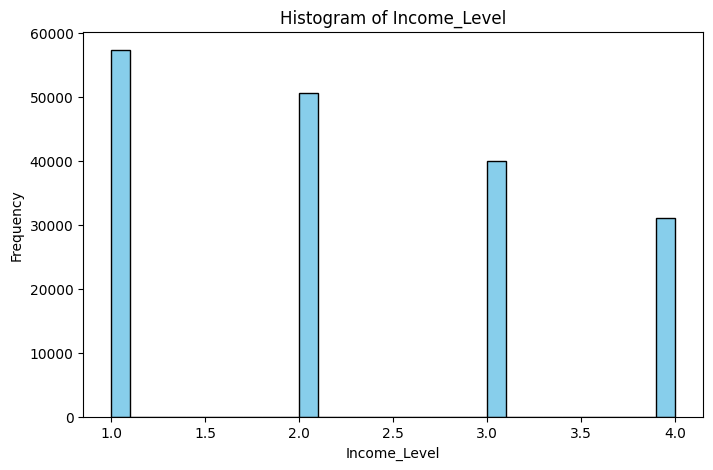

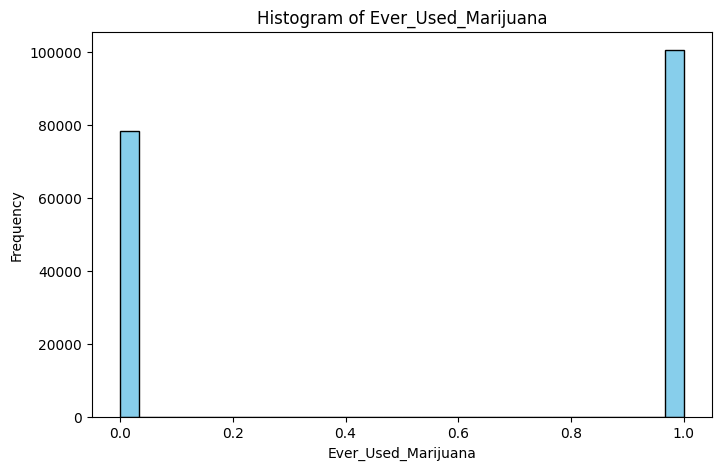

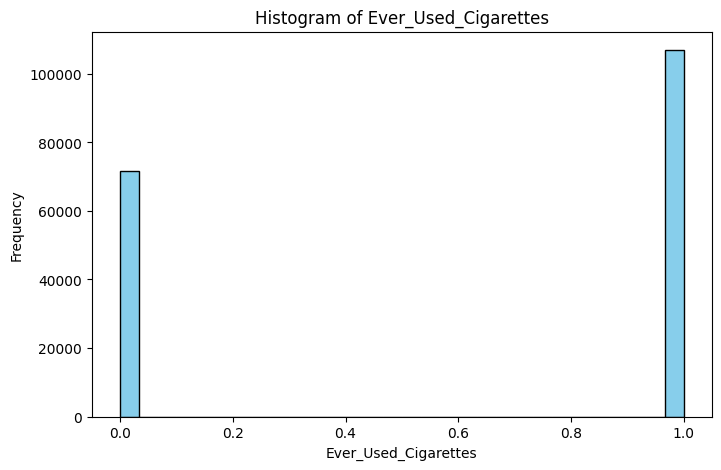

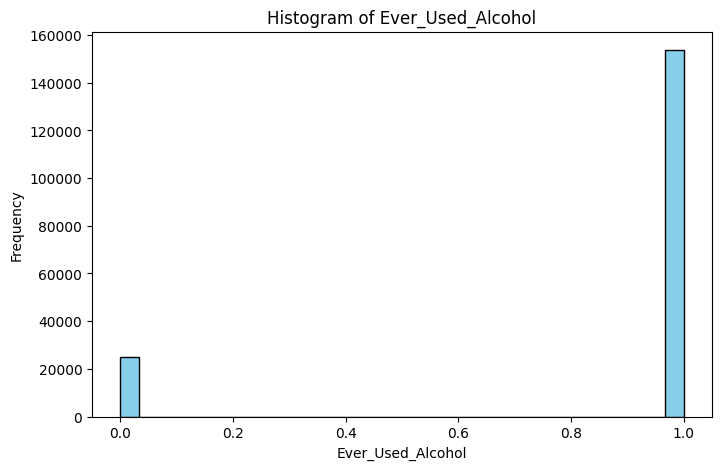

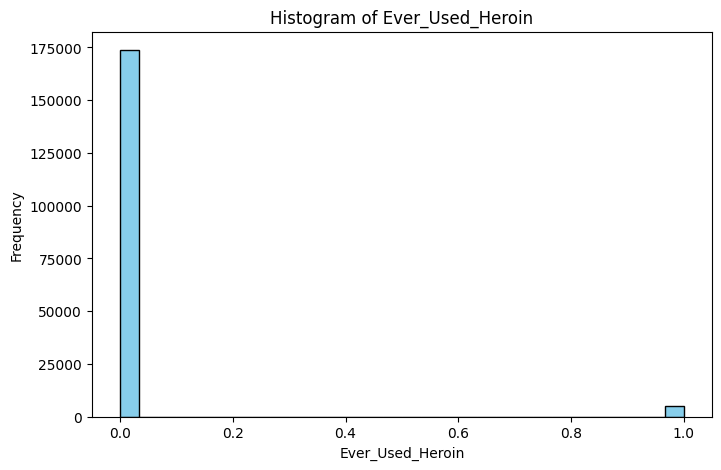

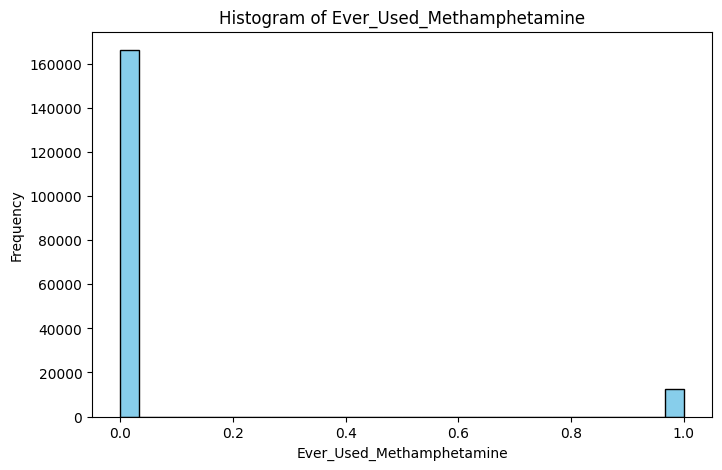

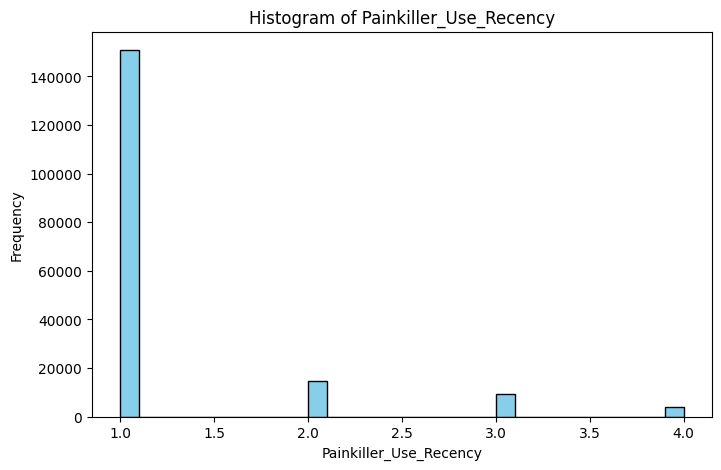

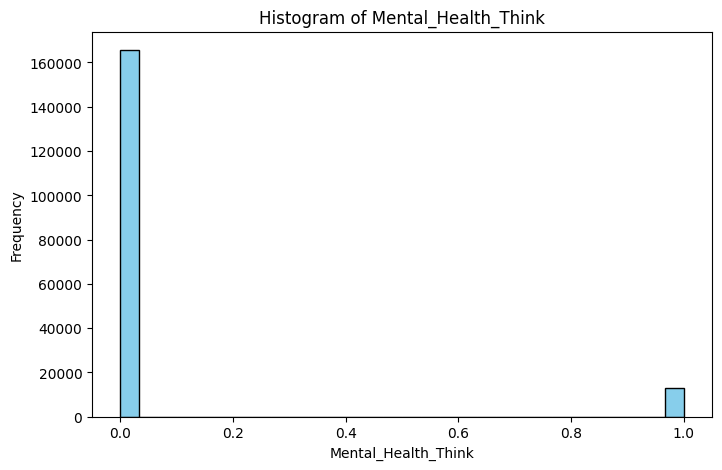

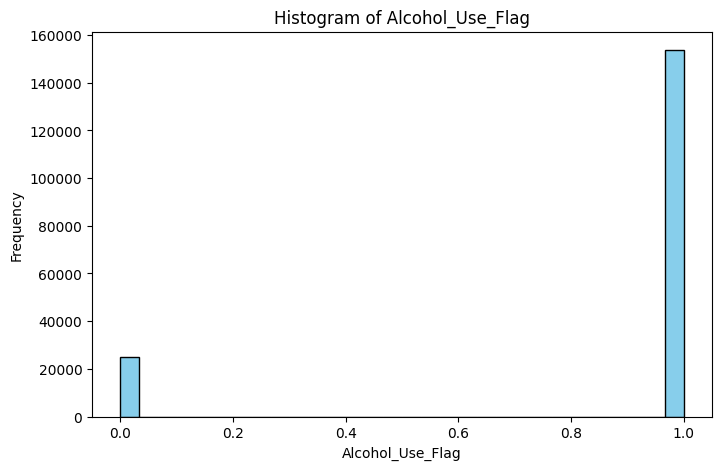

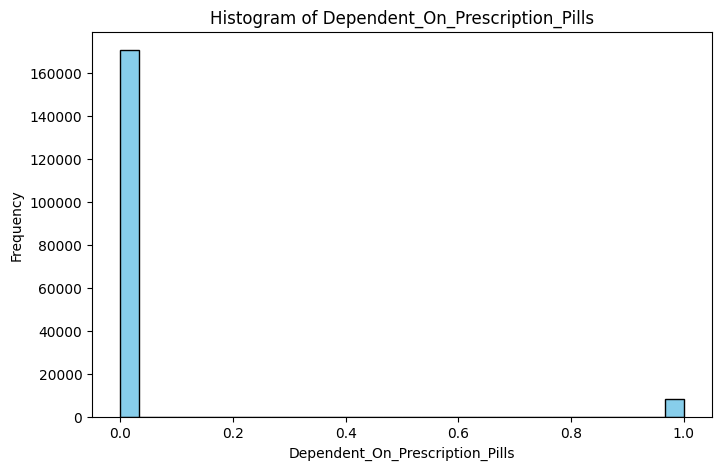

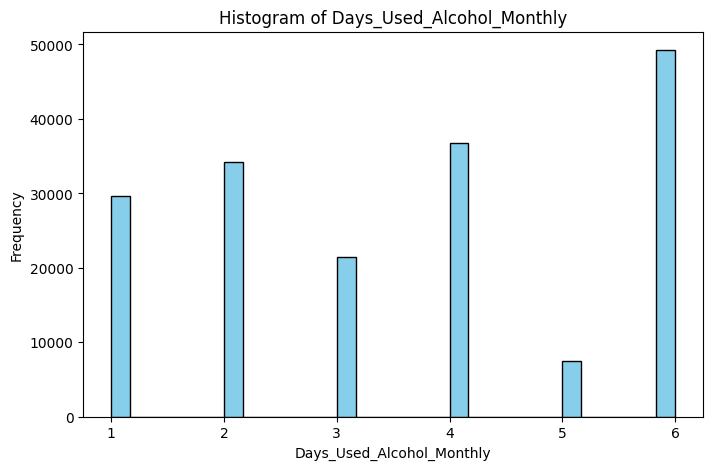

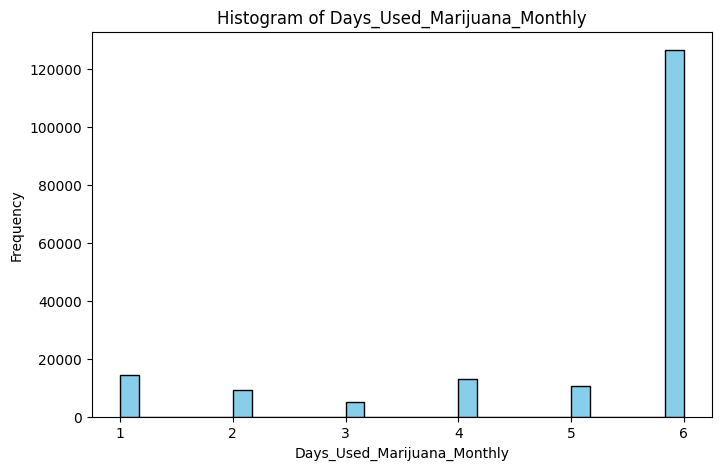

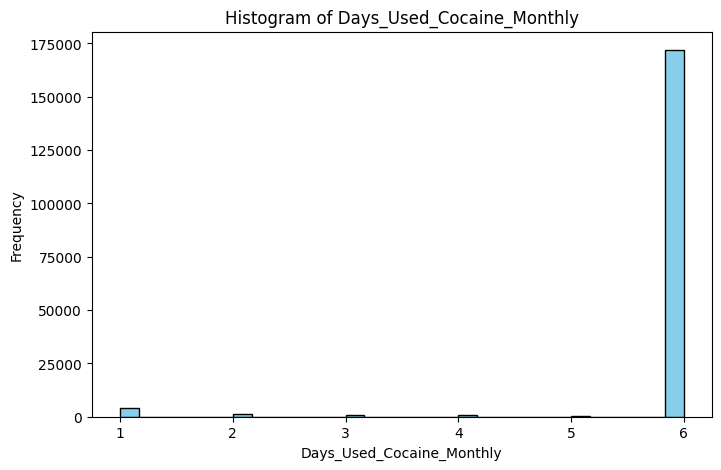

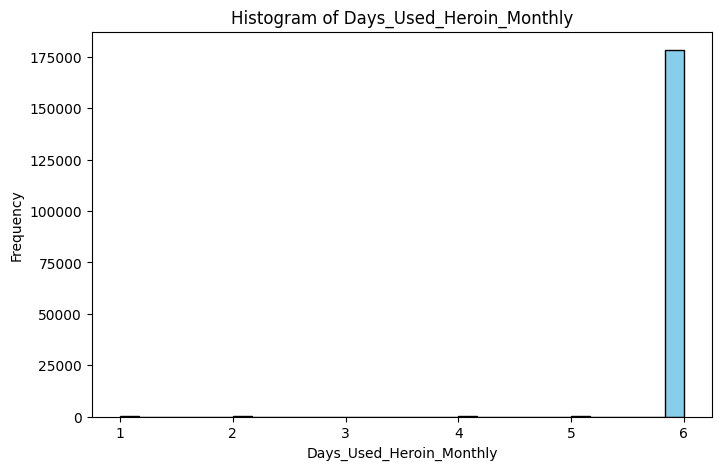

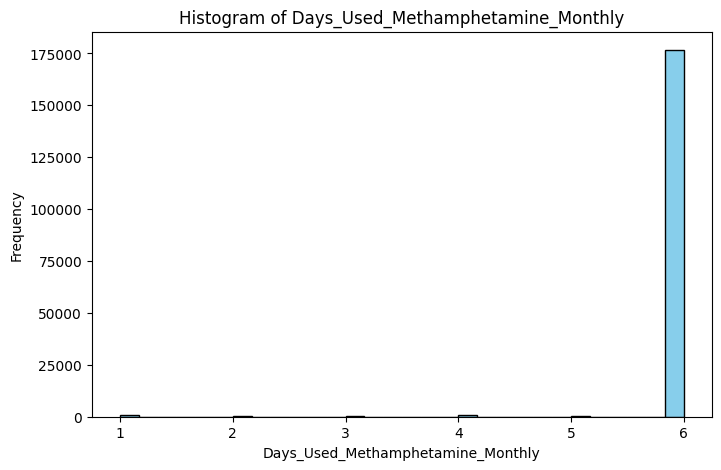

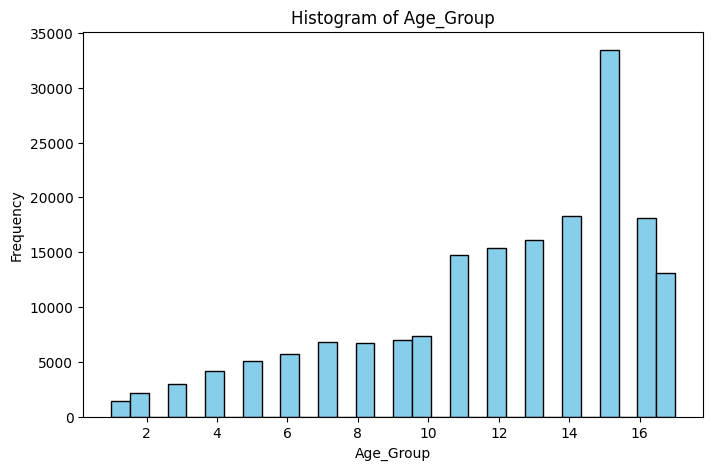

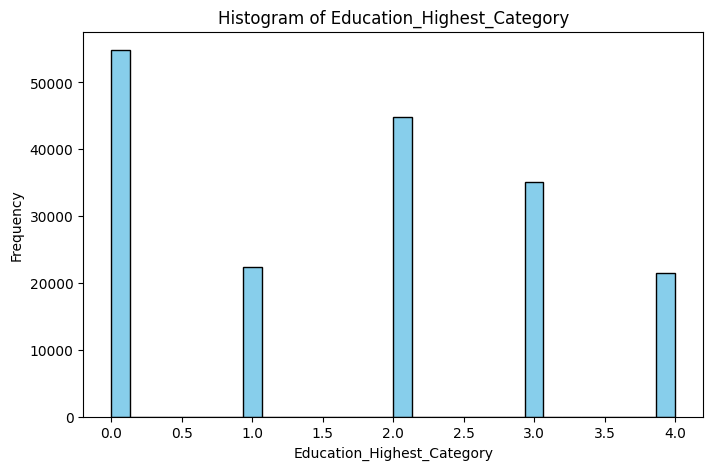

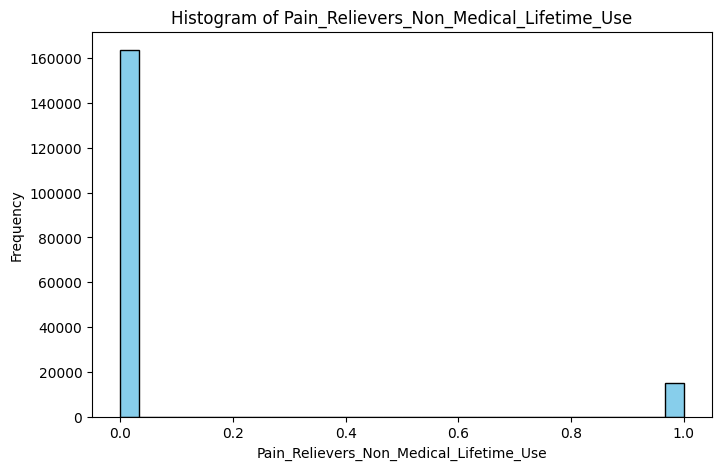

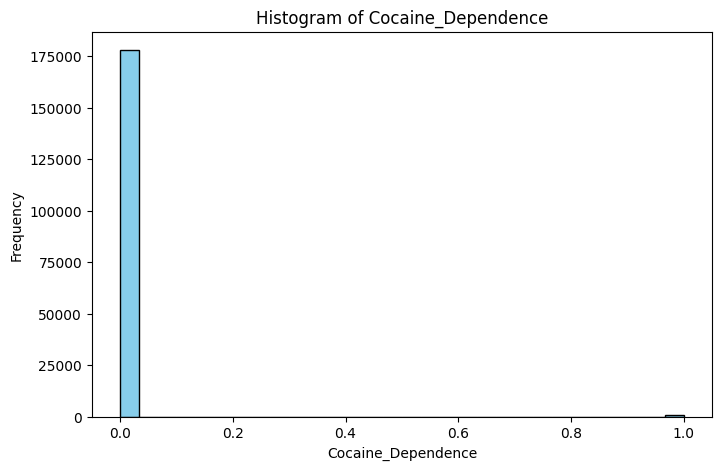

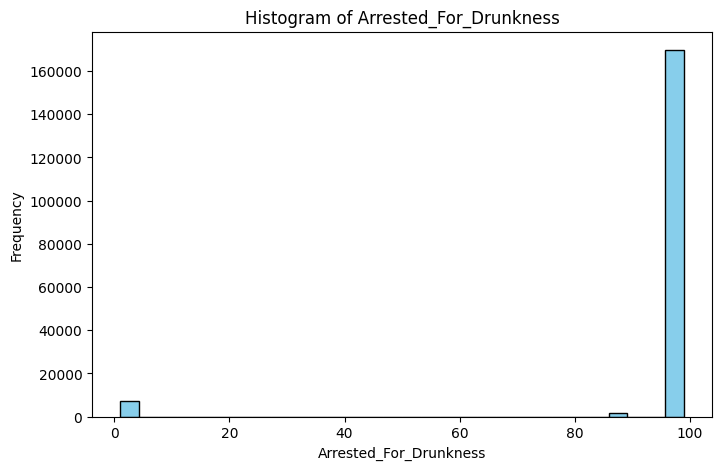

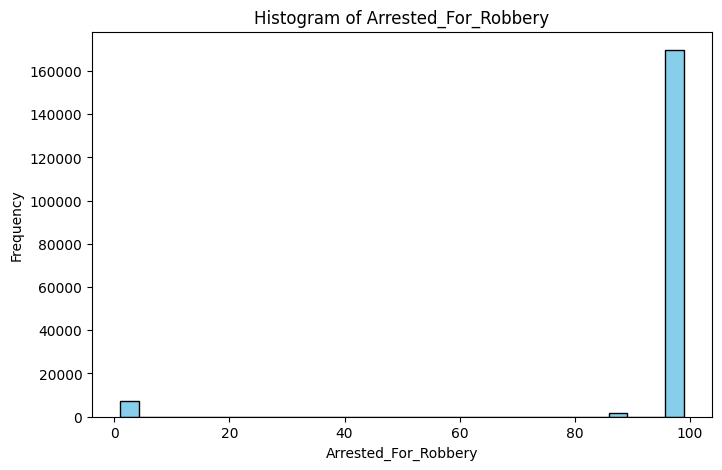

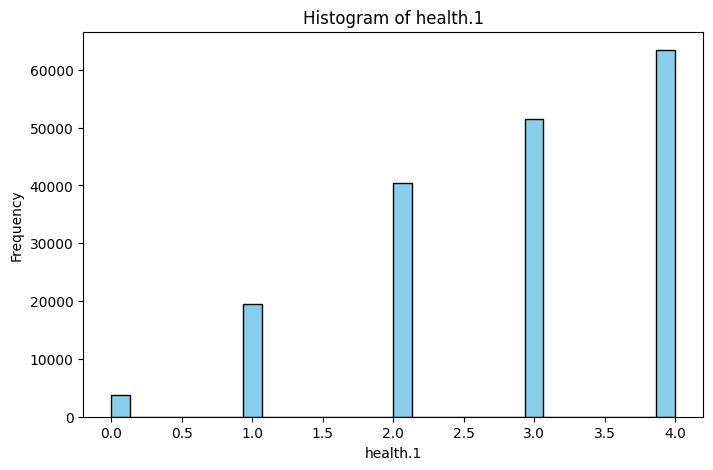

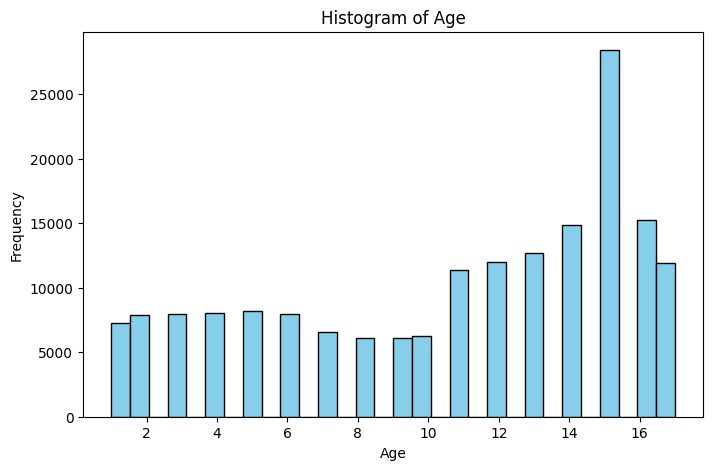

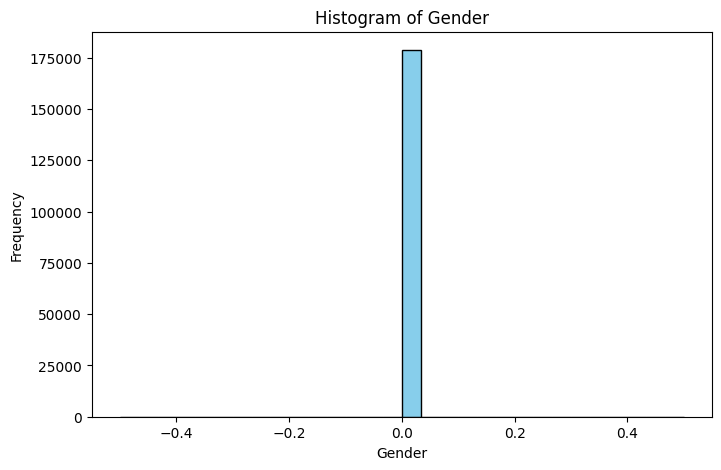

In [70]:
import matplotlib.pyplot as plt

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numerical feature
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#Feature Enginearing

In [71]:
df[['Ever_Used_Marijuana', 'Ever_Used_Cigarettes',
       'Ever_Used_Alcohol', 'Ever_Used_Heroin', 'Ever_Used_Methamphetamine']]

,Ever_Used_Marijuana,Ever_Used_Cigarettes,Ever_Used_Alcohol,Ever_Used_Heroin,Ever_Used_Methamphetamine
0,0,1,1,0,0
1,1,1,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,1,0,0
...,...,...,...,...,...
282739,0,1,1,0,0
282741,1,1,1,0,0
282743,1,1,1,0,0
282744,1,0,1,0,0


In [72]:
df["Currently_Using_Drugs"] = (
    df[['Ever_Used_Marijuana', 'Ever_Used_Cigarettes', 'Ever_Used_Alcohol',
        'Ever_Used_Heroin', 'Ever_Used_Methamphetamine']] == 1
).any(axis=1).map({True: 'Yes', False: 'No'})


In [73]:
df["Currently_Using_Drugs"].replace(['Yes','No'],[1,0],inplace=True)

C:\Users\muhammed sadiq\AppData\Local\Temp\ipykernel_11188\3029126244.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Currently_Using_Drugs"].replace(['Yes','No'],[1,0],inplace=True)
C:\Users\muhammed sadiq\AppData\Local\Temp\ipykernel_11188\3029126244.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin

In [74]:
df["Currently_Using_Drugs"].value_counts()

Currently_Using_Drugs
1    161904
0     16777
Name: count, dtype: int64

In [75]:
#df.drop(columns=['Ever_Used_Marijuana', 'Ever_Used_Cigarettes',
      # 'Ever_Used_Alcohol', 'Ever_Used_Heroin', 'Ever_Used_Methamphetamine'],inplace=True)

In [76]:
import pandas as pd
# List of columns representing drug usage in number of days
drug_usage_columns = ['Days_Used_Marijuana_Monthly','Days_Used_Cocaine_Monthly','Days_Used_Heroin_Monthly','Days_Used_Methamphetamine_Monthly','Days_Used_Alcohol_Monthly']

# Ensure only existing columns are considered
drug_usage_columns = [col for col in drug_usage_columns if col in df.columns]

# Creating the target feature: Total number of days the person used any drug
df['total_drug_use_days'] = df[drug_usage_columns].sum(axis=1, skipna=True)



# Display the first few rows of the new target feature
print(df[['total_drug_use_days']].head(10))

   total_drug_use_days
0                 25.0
1                 26.0
2                 26.0
3                 25.0
4                 25.0
5                 28.0
6                 27.0
7                 30.0
8                 30.0
9                 30.0


In [77]:
df['total_drug_use_days'].value_counts()

total_drug_use_days
30.0    43394
26.0    28399
25.0    28207
28.0    21827
27.0    17524
23.0     8324
24.0     8173
22.0     5760
21.0     5548
29.0     5301
20.0     3837
19.0      930
18.0      674
17.0      327
16.0      217
15.0      127
14.0       51
13.0       26
12.0       15
11.0        9
10.0        8
7.0         1
9.0         1
8.0         1
Name: count, dtype: int64

In [78]:
def classify_risk(days):
    if days <=25:
        return 0  # Low Risk
    else:
        return 1  # High Risk

df['drug_risk_level'] = df['total_drug_use_days'].apply(classify_risk)

In [79]:
df['drug_risk_level'].value_counts()

drug_risk_level
1    116445
0     62236
Name: count, dtype: int64

In [80]:
#I dropped these columns because I combined them into a single feature.
df.drop(columns=['Days_Used_Marijuana_Monthly','Days_Used_Cocaine_Monthly','Days_Used_Heroin_Monthly','Days_Used_Methamphetamine_Monthly','Days_Used_Alcohol_Monthly'],inplace=True)

In [81]:
#  # Import necessary libraries
# from imblearn.over_sampling import SMOTE  # SMOTE is used for handling class imbalance by generating synthetic samples
# import pandas as pd  # Pandas is used for data manipulation and creating DataFrames

#  # Define Features (X) and Target (y)
# X = df.drop(columns=['drug_risk_level'])  # X contains all features except the target variable
# y = df['drug_risk_level']  # y contains the target variable (0: Low Risk, 1: High Risk)

# # Apply SMOTE to balance the dataset
# #sampling_strategy='auto' means the minority class will be oversampled to match the majority class
# #random_state=42 ensures reproducibility (same results every time)
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)  # Generates synthetic samples for the minority class

# # # Convert the resampled arrays back into a DataFrame
# df_resampled = pd.DataFrame(X_resampled, columns=X.columns)  # Convert features back to DataFram
# df_resampled['drug_risk_level'] = y_resampled  # Add the target column back to the DataFrame

# # # Check the class distribution after balancing
# print(df_resampled['drug_risk_level'].value_counts())  # Prints the number of samples in each class

In [82]:
# Import necessary libraries
from imblearn.under_sampling import RandomUnderSampler  # For under-sampling the majority class
import pandas as pd  # For data manipulation

# Define Features (X) and Target (y)
X = df.drop(columns=['drug_risk_level'])  # Features
y = df['drug_risk_level']  # Target variable

# Apply Random Under-Sampling to balance the dataset
# random_state=42 ensures reproducibility
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)  # Removes samples from the majority class

# Convert the resampled arrays back into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)  # Convert features back to DataFrame
df_resampled['drug_risk_level'] = y_resampled  # Add the target column back to the DataFrame

# Check the class distribution after balancing
print(df_resampled['drug_risk_level'].value_counts())  # Prints the number of samples in each class


drug_risk_level
0    62236
1    62236
Name: count, dtype: int64


In [83]:
df_resampled.duplicated().sum()

np.int64(15040)

In [84]:
df_resampled.drop_duplicates(inplace=True)

#Corrilation Of Data

In [85]:
"""This dataset contains 47 features, so plotting a heatmap with all
features together makes it difficult to visualize relationships clearly.
That's why I created a subset of features to analyze the correlation
more effectively"""

"This dataset contains 47 features, so plotting a heatmap with all\nfeatures together makes it difficult to visualize relationships clearly.\nThat's why I created a subset of features to analyze the correlation\nmore effectively"

In [86]:
df_resample_Subset=df_resampled[['Income_Level', 'Ever_Used_Marijuana', 'Ever_Used_Cigarettes',
       'Ever_Used_Alcohol', 'Ever_Used_Heroin', 'Ever_Used_Methamphetamine',
       'Painkiller_Use_Recency', 'Mental_Health_Think', 'Alcohol_Use_Flag',
       'Dependent_On_Prescription_Pills','drug_risk_level']]

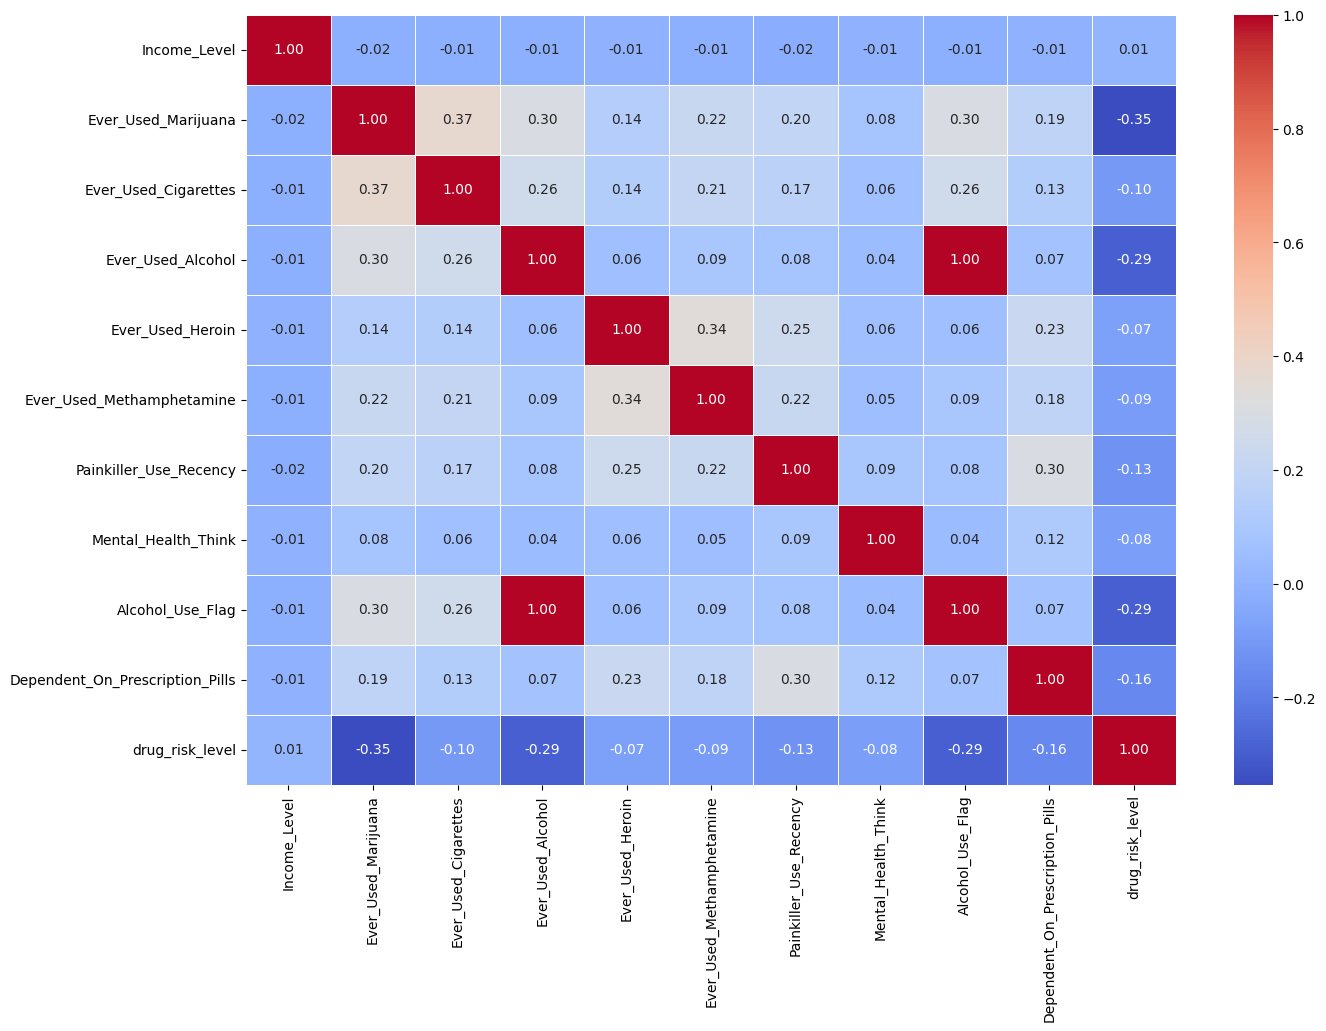

In [87]:
import seaborn as sns
#calculate the correlation of df_subse df_resampled_subset
correlation_matrix = df_resample_Subset.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))  # Adjust the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

In [88]:
#To remove columns that have very little correlation with the target feature
df_resampled.drop(columns=['Income_Level'],inplace=True)

In [89]:
df_resampled_Second_Subset=df_resampled[[ 'Age_Group',
       'Education_Highest_Category', 'Pain_Relievers_Non_Medical_Lifetime_Use',
       'Cocaine_Dependence', 'Arrested_For_Drunkness', 'Arrested_For_Robbery',
       'health.1', 'Age', 'Currently_Using_Drugs','total_drug_use_days', 'drug_risk_level']]

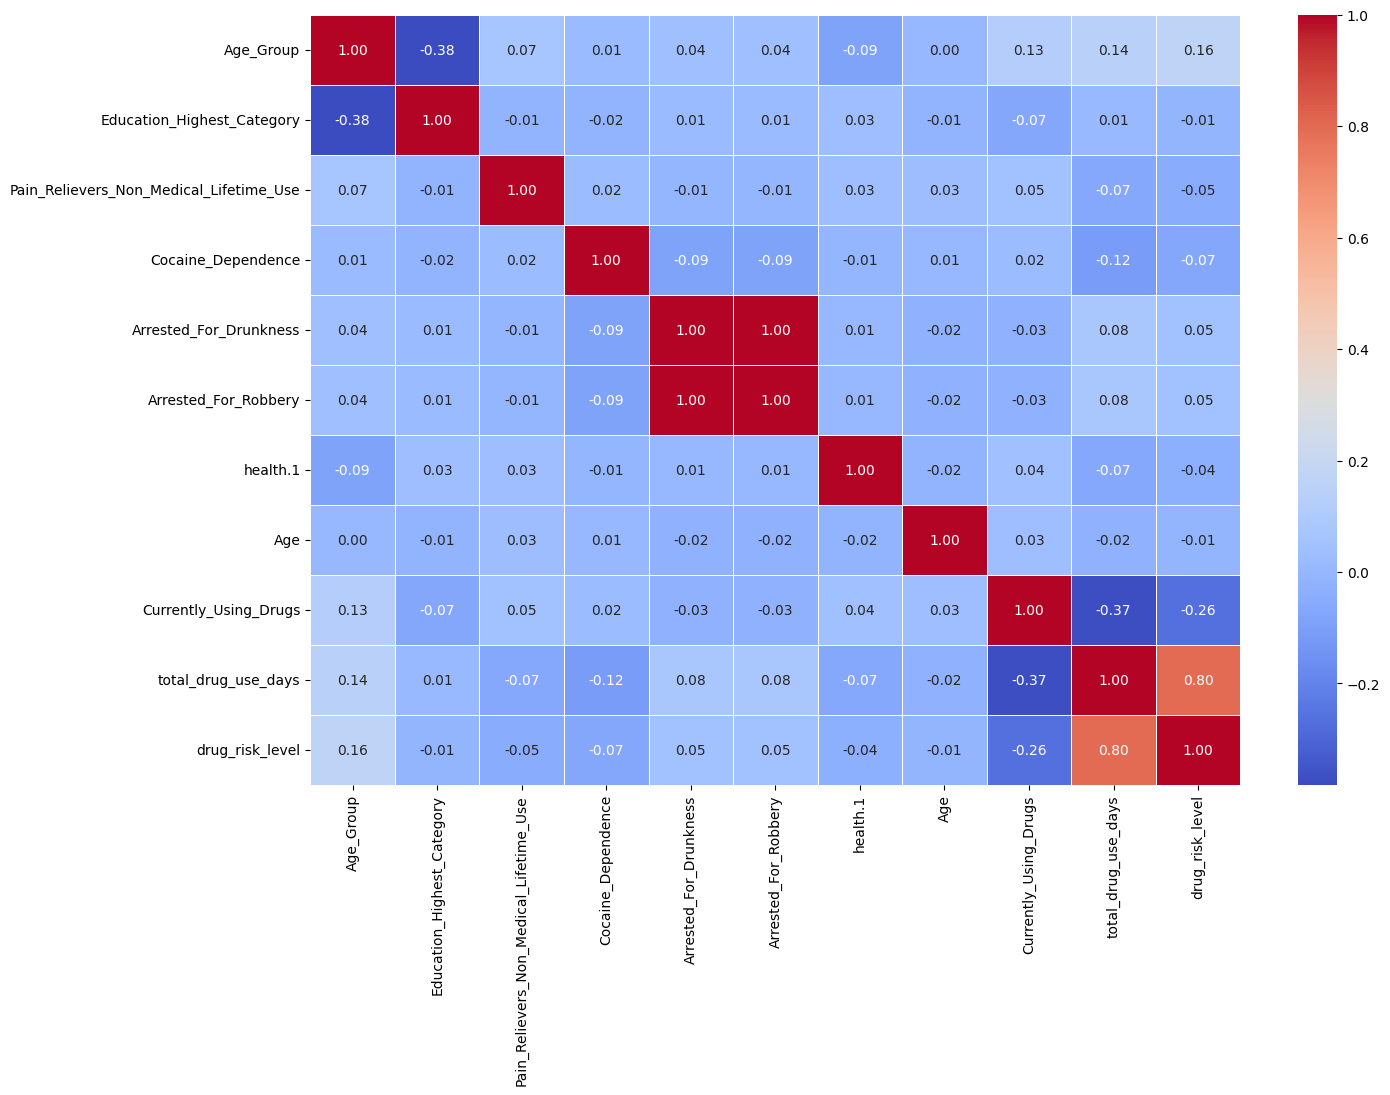

In [90]:
#calculate the correlation of df_resampled_Second_Subset
correlation_matrix = df_resampled_Second_Subset.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))  # Adjust the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

In [91]:
#To remove columns that have very little correlation with the target feature
df_resampled.drop(columns=['Age','Cocaine_Dependence'],inplace=True)

In [92]:
#To remove one feature from pairs of highly correlated features
df_resampled.drop(columns=['Arrested_For_Robbery','Arrested_For_Drunkness'],inplace=True)

# Outlier Detection

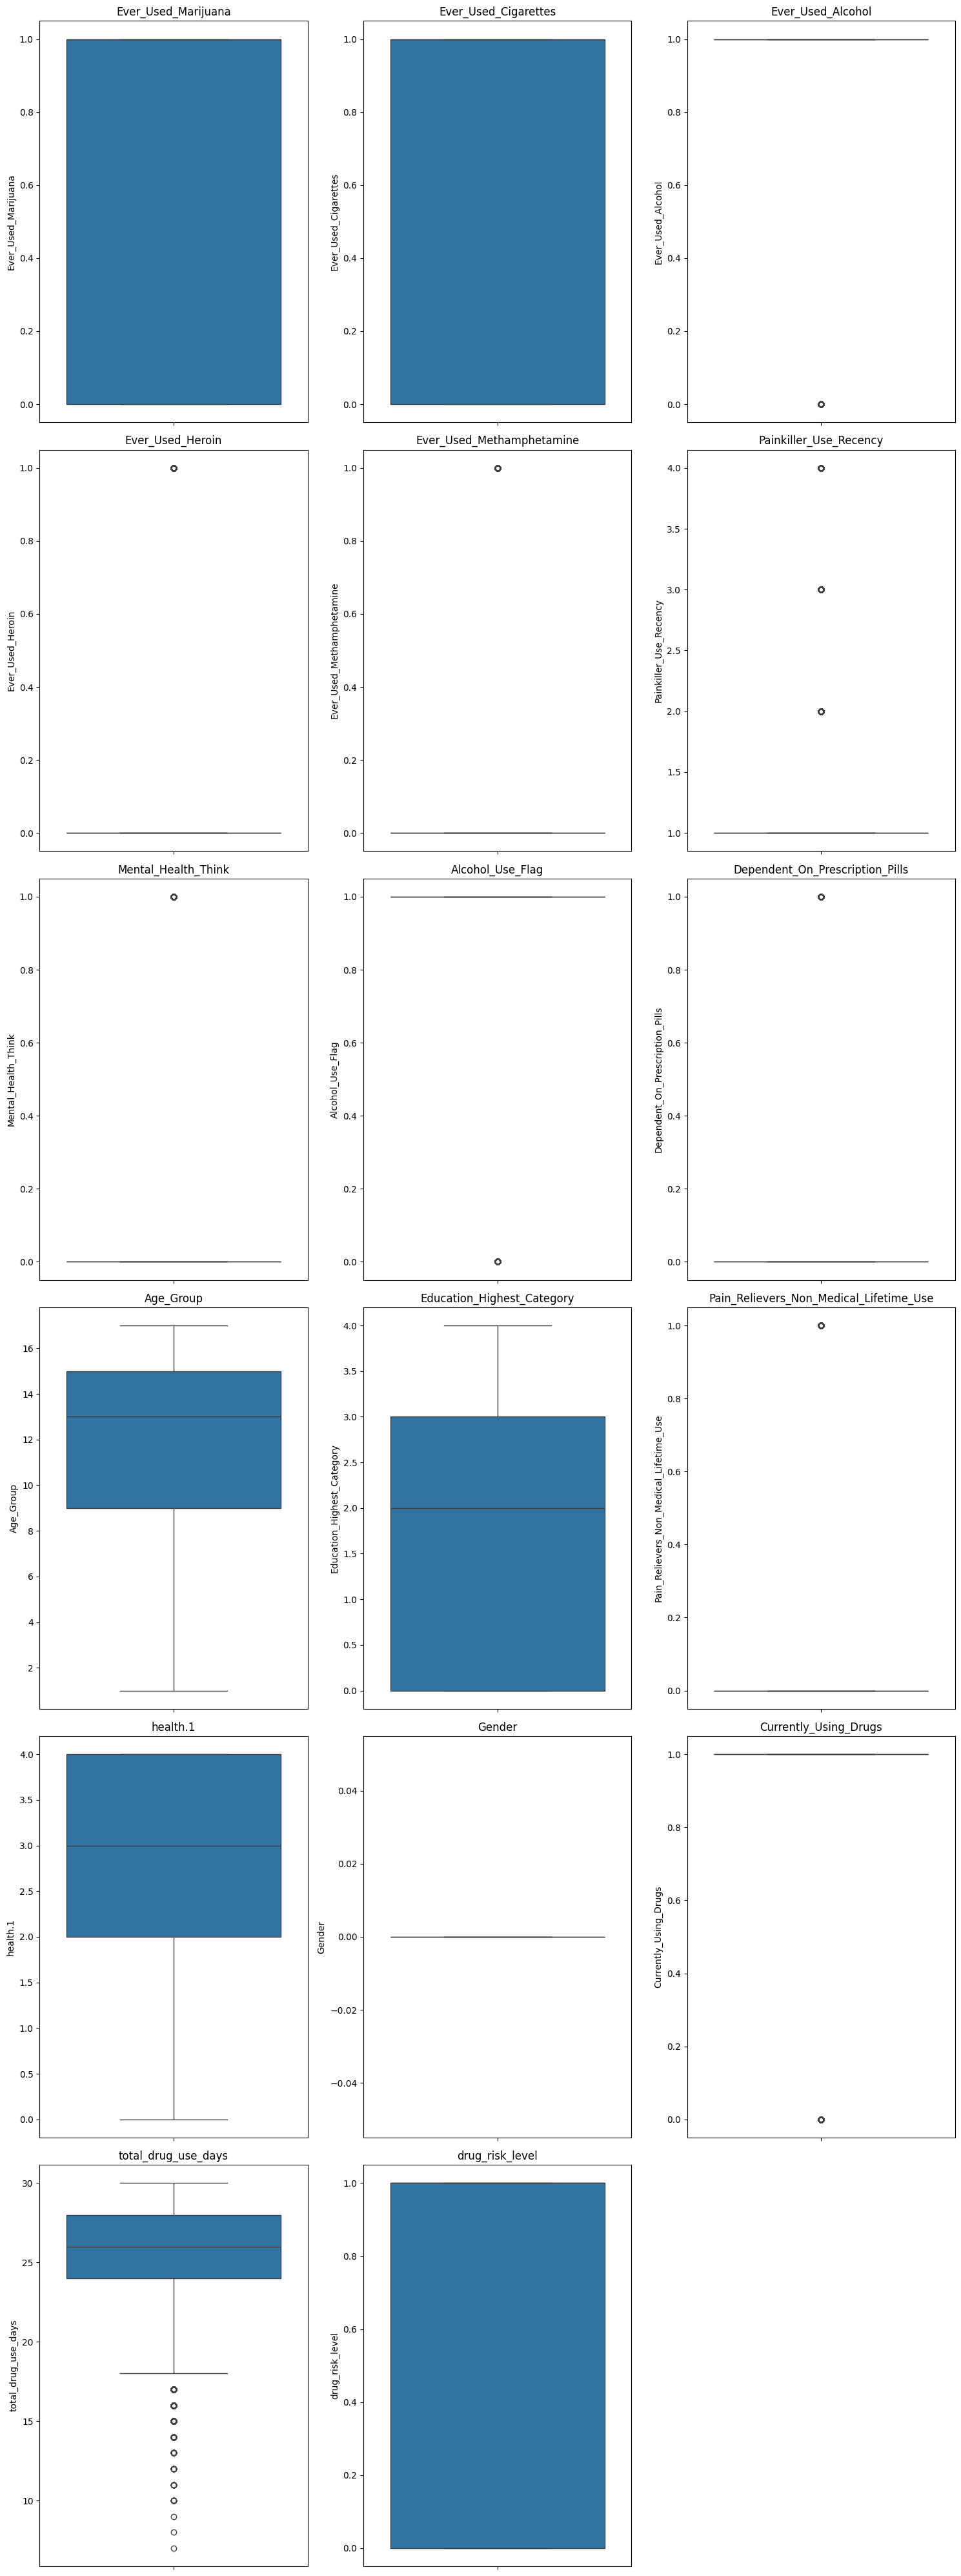

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 40))

# Loop through each feature and create a box plot
for i, column in enumerate(df_resampled.columns, 1):
    plt.subplot(len(df_resampled.columns) // 3 + 1, 3, i)  # Arrange plots in a grid (3 per row)
    sns.boxplot(y=df_resampled[column])
    plt.title(column)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


In [94]:
import pandas as pd

# Define the target features to exclude from outlier removal
target_features = 'drug_risk_level'
classification_target_feature='drug_risk_level'

# Set a copy of the original DataFrame to apply filtering
df_resampled_filtered = df_resampled.copy()

# Loop through each column except the target features
for column in df_resampled_filtered.columns:
  for i in target_features:
    if column not in i:  # Ensure target columns are not modified
        # Calculate Q1 and Q3
        Q1 = df_resampled_filtered[column].quantile(0.25)
        Q3 = df_resampled_filtered[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out rows with outliers in the current column
        df_resampled_filtered = df_resampled_filtered[(df_resampled_filtered[column] >= lower_bound) & (df_resampled_filtered[column] <= upper_bound)]

# Display the cleaned DataFrame
print(df_resampled_filtered)


        Ever_Used_Marijuana  Ever_Used_Cigarettes  Ever_Used_Alcohol  \
0                         0                     1                  1   
4                         0                     1                  1   
18                        1                     1                  1   
24                        1                     1                  1   
34                        0                     0                  1   
...                     ...                   ...                ...   
264204                    1                     1                  1   
216025                    0                     0                  1   
107224                    0                     1                  1   
35450                     0                     1                  1   
145488                    0                     0                  1   

        Ever_Used_Heroin  Ever_Used_Methamphetamine  Painkiller_Use_Recency  \
0                      0                          0     

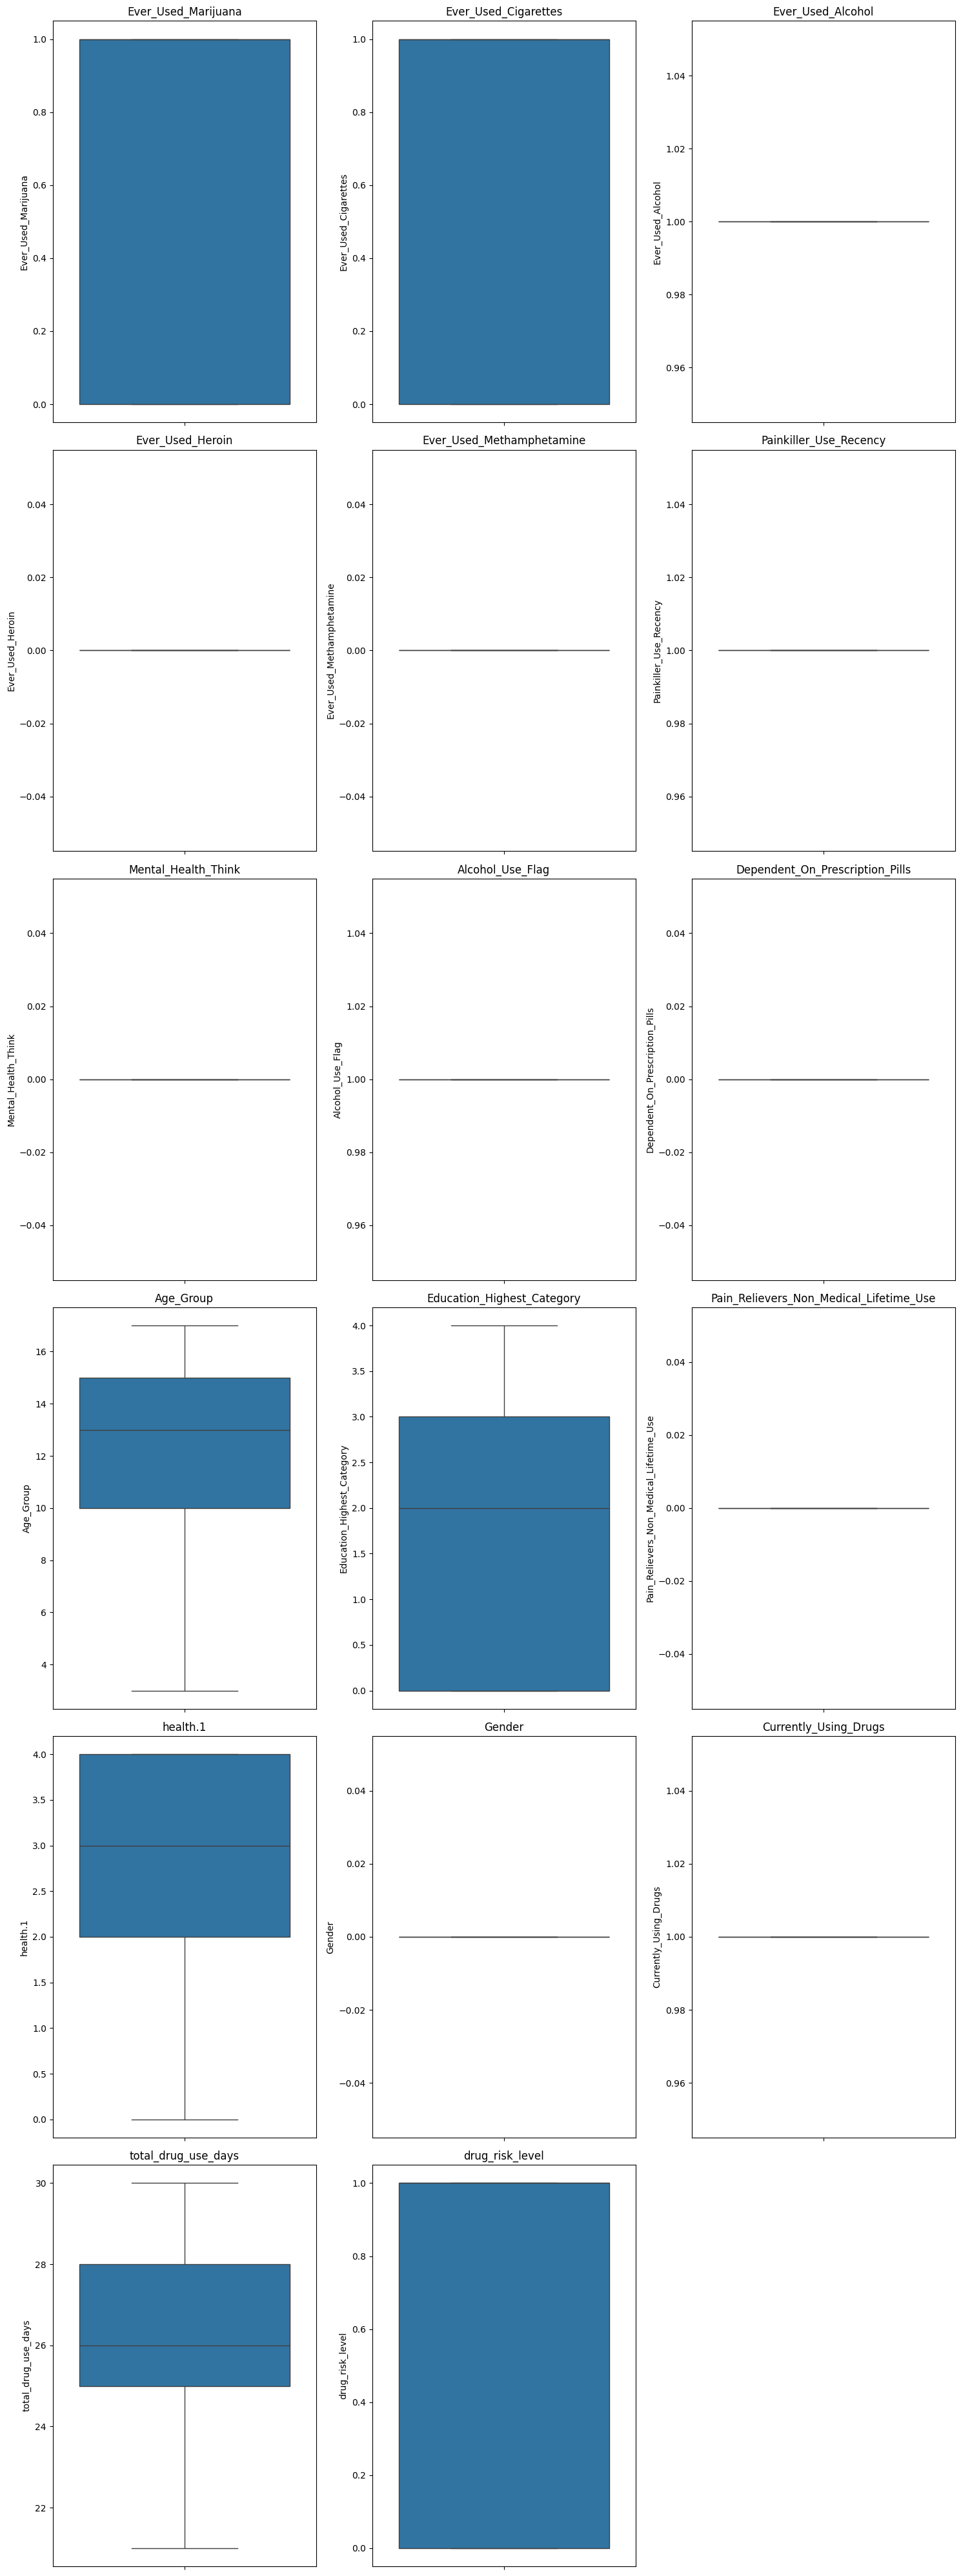

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 40))

# Loop through each feature and create a box plot
for i, column in enumerate(df_resampled_filtered.columns, 1):
    plt.subplot(len(df_resampled_filtered.columns) // 3 + 1, 3, i)  # Arrange plots in a grid (3 per row)
    sns.boxplot(y=df_resampled_filtered[column])
    plt.title(column)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

#Data Scaling
Standardlization or Normalization

In [96]:
# select independence features
x=df_resampled[['Painkiller_Use_Recency','Mental_Health_Think',
       'Dependent_On_Prescription_Pills', 'Age_Group',
       'Education_Highest_Category', 'Pain_Relievers_Non_Medical_Lifetime_Use',
        'health.1', 'Gender', 'Currently_Using_Drugs',
       'total_drug_use_days']]

# Selecting 'drug_risk_level' as the target variable (y)
y = df_resampled['drug_risk_level']

x.to_csv('claned_csv_file.csv',index=False)

In [97]:
from sklearn.preprocessing import StandardScaler
import pickle
# 1. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
print("✅ Scaler saved as 'scaler.pkl'")

✅ Scaler saved as 'scaler.pkl'


# Initial Modeling and Hypothesis Testing
## "Train the classification model, make predictions, and evaluate performance by calculating error metrics."

In [98]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from imblearn.under_sampling import RandomUnderSampler

# # Assume x, y are already defined and preprocessed
# # Example:
# # x = df.drop('target', axis=1)
# # y = df['target']

# # 2. Undersample majority class
# rus = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X_scaled, y)

# # 3. Split data
# X_train, X_test, y_train, y_test = train_test_split(
#     X_resampled, y_resampled, test_size=0.25, stratify=y_resampled, random_state=42
# )

# # 4. Add a bit of label noise (convert to numpy for indexing)
# y_train = y_train.to_numpy()
# np.random.seed(42)
# noise_indices = np.random.choice(len(y_train), size=int(0.05 * len(y_train)), replace=False)
# y_train[noise_indices] = 1 - y_train[noise_indices]

# # 5. Regularized models
# models = {
#     "Random Forest": RandomForestClassifier(
#         n_estimators=30, max_depth=2, min_samples_split=15, random_state=42
#     ),
#     "Decision Tree": DecisionTreeClassifier(
#         max_depth=2, min_samples_split=20, min_samples_leaf=10, random_state=42
#     ),
#     "Logistic Regression": LogisticRegression(
#         C=0.01, solver='liblinear', penalty='l1', random_state=42
#     ),
#     "SVM (Linear)": SVC(
#         kernel='linear', C=0.01, probability=True, random_state=42
#     ),
#     "XGBoost": XGBClassifier(
#         n_estimators=20, learning_rate=0.01, max_depth=2,
#         reg_lambda=10.0, reg_alpha=5.0, subsample=0.5, colsample_bytree=0.5,
#         use_label_encoder=False, eval_metric='logloss', random_state=42
#     )
# }

# # 6. Evaluation function
# def evaluate(model, name):
#     print(f"\n{name}")
#     model.fit(X_train, y_train)

#     y_train_pred = model.predict(X_train)
#     y_test_pred = model.predict(X_test)

#     print("Train:")
#     print(f"  Accuracy : {accuracy_score(y_train, y_train_pred):.4f}")
#     print(f"  F1 Score : {f1_score(y_train, y_train_pred):.4f}")

#     print("Test:")
#     print(f"  Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")
#     print(f"  Precision: {precision_score(y_test, y_test_pred):.4f}")
#     print(f"  Recall   : {recall_score(y_test, y_test_pred):.4f}")
#     print(f"  F1 Score : {f1_score(y_test, y_test_pred):.4f}")

# # 7. Run evaluation
# for name, model in models.items():
#     evaluate(model, name)


In [99]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

# Assume x, y are already defined and preprocessed

# 1. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# 2. Undersample
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_scaled, y)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.25, stratify=y_resampled, random_state=42
)

# 4. Add label noise
y_train = y_train.to_numpy()
np.random.seed(42)
noise_indices = np.random.choice(len(y_train), size=int(0.05 * len(y_train)), replace=False)
y_train[noise_indices] = 1 - y_train[noise_indices]

# 5. Random Forest Model
rf = RandomForestClassifier(
    n_estimators=30, max_depth=2, min_samples_split=15, random_state=42
)

# 6. Train
rf.fit(X_train, y_train)

# 7. Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# 8. Evaluation
print("\n🎯 Random Forest Evaluation")

print("\nTrain:")
print(f"  Accuracy : {accuracy_score(y_train, y_train_pred):.4f}")
print(f"  F1 Score : {f1_score(y_train, y_train_pred):.4f}")

print("\nTest:")
print(f"  Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")
print(f"  Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"  Recall   : {recall_score(y_test, y_test_pred):.4f}")
print(f"  F1 Score : {f1_score(y_test, y_test_pred):.4f}")

# 9. Save the model using pickle
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf, file)

print("\n✅ Random Forest model saved as 'random_forest_model.pkl'")



🎯 Random Forest Evaluation

Train:
  Accuracy : 0.9500
  F1 Score : 0.9500

Test:
  Accuracy : 1.0000
  Precision: 1.0000
  Recall   : 1.0000
  F1 Score : 1.0000

✅ Random Forest model saved as 'random_forest_model.pkl'


In [100]:
df_resampled.drop(columns=['Gender'],inplace=True)

## Documentation And Reporting

In [101]:
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
    'Correlation with drug_risk_level ': df_resampled.corr()['drug_risk_level'].sort_values(ascending=False)
}
print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")
# Prepare final dataset for modeling
final_df = x=df_resampled[['Painkiller_Use_Recency','Mental_Health_Think',
       'Dependent_On_Prescription_Pills', 'Age_Group',
       'Education_Highest_Category', 'Pain_Relievers_Non_Medical_Lifetime_Use',
        'health.1', 'Currently_Using_Drugs',
       'total_drug_use_days','drug_risk_level']]

EDA Summary:
Dataset Shape: (178681, 22)
Missing Values: 0
Correlation with drug_risk_level : drug_risk_level                            1.000000
total_drug_use_days                        0.797383
Age_Group                                  0.164308
Education_Highest_Category                -0.011802
health.1                                  -0.038771
Pain_Relievers_Non_Medical_Lifetime_Use   -0.048262
Ever_Used_Heroin                          -0.074841
Mental_Health_Think                       -0.080478
Ever_Used_Methamphetamine                 -0.089341
Ever_Used_Cigarettes                      -0.102384
Painkiller_Use_Recency                    -0.131054
Dependent_On_Prescription_Pills           -0.161759
Currently_Using_Drugs                     -0.263972
Ever_Used_Alcohol                         -0.291494
Alcohol_Use_Flag                          -0.291812
Ever_Used_Marijuana                       -0.353720
Name: drug_risk_level, dtype: float64


 http://127.0.0.1:5000

print("""This project, titled "Drug Use Risk Prediction Using Machine Learning," aims to address the growing concern of drug abuse by identifying individuals who are at risk based on their behavioral and demographic attributes. The data was extracted and preprocessed from the publicly available National Survey of Drug Use and Health (2015–2019) dataset available on Kaggle. Using information such as age, gender, education level, mental health status, and drug history, a machine learning model was trained to classify individuals as either Low Risk or High Risk. After performing detailed exploratory data analysis (EDA), feature encoding, and scaling, a Random Forest Classifier was implemented to predict the risk category. The model was integrated into a Flask-based web application that collects user input via an HTML form, processes the data, and displays the prediction along with a set of personalized recommendations. The application is user-friendly, efficient, and built using tools like Python, Pandas, Scikit-learn, HTML, and Flask. The Flask app runs locally on http://127.0.0.1:5000, where users can access the system and interact with it in real-time. This AI-based system helps in early intervention, supports healthcare professionals in making decisions, and raises awareness by delivering clear and supportive feedback to users. The project highlights the real-world application of machine learning in solving health and social issues and can be further enhanced by deploying it online, improving UI with frameworks like Bootstrap, or integrating chatbot support for real-time assistance.""")
